In [174]:
# Costco Financial Analysis (1997-2007)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.ticker as ticker
%matplotlib inline

In [175]:
# Try to set a pleasant style; fallback to default if not
try:
    plt.style.use('ggplot')
except:
    print("'ggplot' style not available. Using default style.")

In [176]:
# Import Excel file
try:
    df = pd.read_excel('costcoBook.xlsx', index_col=0)
    print("Data imported successfully. Shape:", df.shape)
    print("\nFirst few rows of the data:")
    print(df.head())
    print("\nColumn names (years):")
    print(df.columns)
except FileNotFoundError:
    print("Error: The file 'costcoBook.xlsx' was not found in the current directory.")
    print("Please ensure the file is in the same directory as this Jupyter Notebook.")
except Exception as e:
    print(f"An error occurred while trying to read the file: {e}")
    print("Please check the file format and contents.")

Data imported successfully. Shape: (79, 5)

First few rows of the data:
                                       1997   1998   1999   2000   2001
Warehouses in Operation                                                
Beginning of year (including Mexico)  265.0  274.0  292.0  308.0  331.0
Openings                               17.0   19.0   23.0   27.0   41.0
Closings                               -8.0   -1.0   -7.0   -4.0   -7.0
End of year                           274.0  292.0  308.0  331.0  365.0
Members at Year End (thousands)         NaN    NaN    NaN    NaN    NaN

Column names (years):
Index([1997, 1998, 1999, 2000, 2001], dtype='int64')


In [177]:
# Create and display a line plot
def create_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

In [178]:
# Calculate ROA and ROE
df.loc['ROA'] = df.loc['Net Income'] / df.loc['Total assets']*100
df.loc['ROE'] = df.loc['Net Income'] / df.loc['Total stockholder’s equity']*100

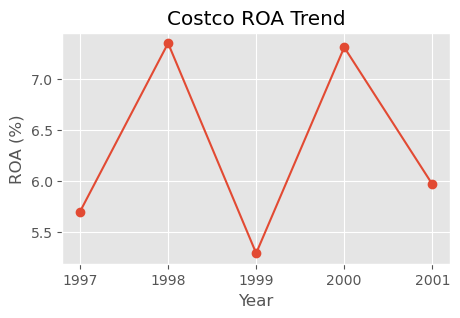

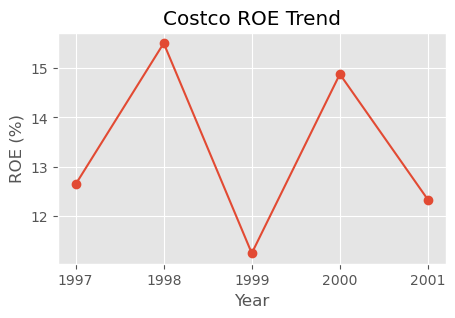

In [179]:
# Create ROA and ROE trend plots
def create_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(5, 3))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
create_line_plot(df.columns.astype(int).astype(str), df.loc['ROA'], 'Costco ROA Trend', 'Year', 'ROA (%)')
create_line_plot(df.columns.astype(int).astype(str), df.loc['ROE'], 'Costco ROE Trend', 'Year', 'ROE (%)')

"Net income in the fourth quarter of fiscal 1999 was impacted by a 50 million USD (30 million USD after-tax, or 0.06 per diluted share) provision for impaired assets and warehouse closing costs primarily related to the Company's planned increase in the number of warehouse relocations to larger and better-located facilities. Before the impact of this charge, net income for the fourth quarter of fiscal 1999 would have been 183.2 million USD, or 0.39 per diluted share and would have resulted in a 9% fourth quarter earnings increase."

https://investor.costco.com/news/news-details/2000/Costco-Wholesale-Corporation-Releases-Fourth-Quarter-and-Fiscal-Year-2000-Results-of-Operations-10-12-2000/default.aspx

In [180]:
# Time Series Analysis: predict future values using linear regression - may not be useful
def predict_future(data, years_to_predict=5):
    x = np.arange(len(data))
    slope, intercept, _, _, _ = stats.linregress(x, data)
    future_x = np.arange(len(data), len(data) + years_to_predict)
    future_y = slope * future_x + intercept
    return future_y

In [181]:
# Predict future values for ROA and ROE
last_year = int(df.columns[-1])
future_years = range(last_year + 1, last_year + 6)  #5 years into the future
future_roa = predict_future(df.loc['ROA'])
future_roe = predict_future(df.loc['ROE'])

In [182]:
# Create new df w/ both historical (1997-2001) and predicted (2002-2006)
extended_df = df.copy()
for i, year in enumerate(future_years):
    extended_df[str(year)] = pd.Series({
        'ROA': future_roa[i],
        'ROE': future_roe[i]
    })
extended_df.loc[['ROA', 'ROE']]

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
Warehouses in Operation,,,,,,,,,,
ROA,5.697263,7.348454,5.289806,7.308367,5.966430,6.471538,6.521363,6.571187,6.621012,6.670837
ROE,12.641221,15.509699,11.239741,14.881093,12.328638,12.943947,12.818569,12.693192,12.567815,12.442438


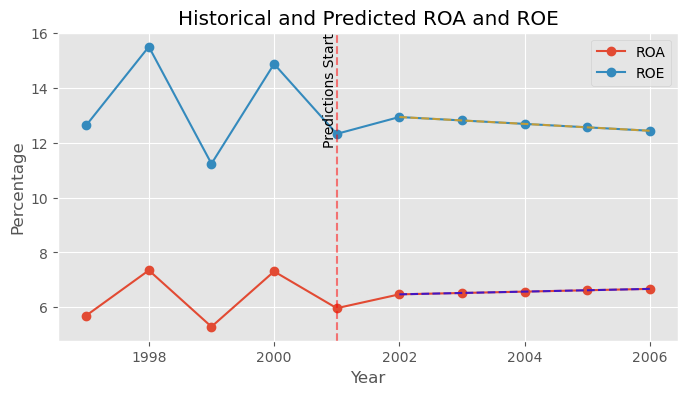

In [183]:
# Plot ROA and ROE
plt.figure(figsize=(8, 4))
plt.plot(extended_df.columns.astype(int), extended_df.loc['ROA'], label='ROA', marker='o')
plt.plot(extended_df.columns.astype(int), extended_df.loc['ROE'], label='ROE', marker='o')

# Highlight predicted values
plt.plot(future_years, future_roa, linestyle='--', color='blue', alpha=0.7)
plt.plot(future_years, future_roe, linestyle='--', color='orange', alpha=0.7)
plt.title('Historical and Predicted ROA and ROE')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Add vertical line to separate historical and predicted
plt.axvline(x=last_year, color='red', linestyle='--', alpha=0.5)
plt.text(last_year, plt.ylim()[1], 'Predictions Start', rotation=90, va='top', ha='right')

plt.show()

In [184]:
# DuPont Analysis -- NEEDS REVIEW: use 'Total revenues' to include membership fees and/or 'Net sales'
df.loc['Profit Margin w/o Membership'] = df.loc['Net Income'] / df.loc['Net sales']
df.loc['Profit Margin w/ Membership'] = df.loc['Net Income'] / df.loc['Total revenues']
df.loc['Asset Turnover w/o Membership'] = df.loc['Net sales'] / df.loc['Total assets']
df.loc['Asset Turnover w/ Membership'] = df.loc['Total revenues'] / df.loc['Total assets']
df.loc['Financial Leverage'] = df.loc['Total assets'] / df.loc['Total stockholder’s equity']

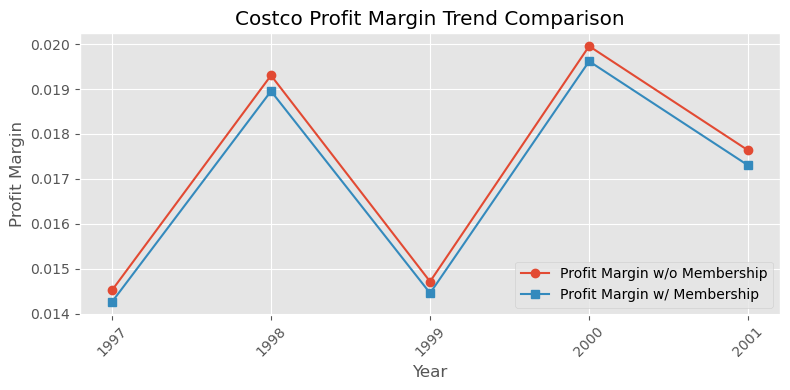

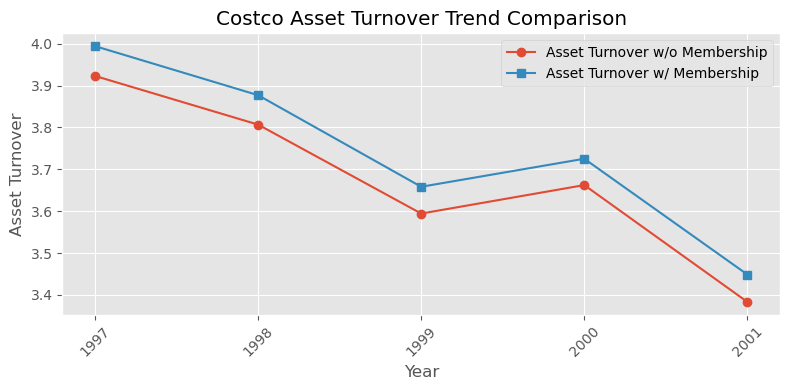

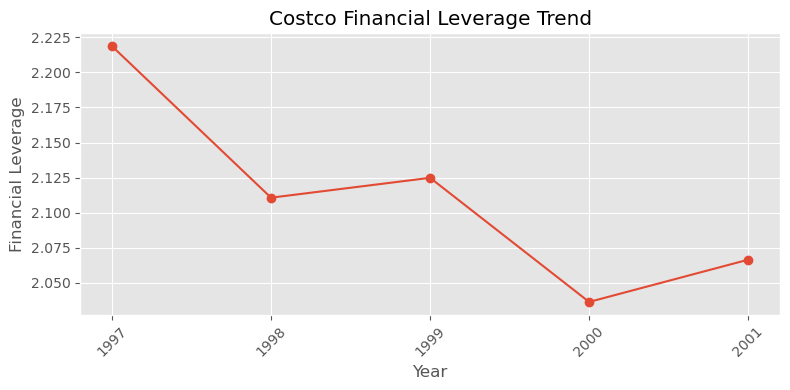

In [185]:
# Create combined plots with and without membership
def create_combined_plot(df, metric1, metric2, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    
    x = df.columns.astype(int).astype(str)
    y1 = df.loc[metric1]
    y2 = df.loc[metric2]
    
    plt.plot(x, y1, label=metric1, marker='o')
    plt.plot(x, y2, label=metric2, marker='s')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create Profit Margin plot
create_combined_plot(
    df,
    'Profit Margin w/o Membership',
    'Profit Margin w/ Membership',
    'Costco Profit Margin Trend Comparison',
    'Year',
    'Profit Margin'
)

# Create Asset Turnover plot
create_combined_plot(
    df,
    'Asset Turnover w/o Membership',
    'Asset Turnover w/ Membership',
    'Costco Asset Turnover Trend Comparison',
    'Year',
    'Asset Turnover'
)

# Create Financial Leverage plot
plt.figure(figsize=(8, 4))
x = df.columns.astype(int).astype(str)
y = df.loc['Financial Leverage']
plt.plot(x, y, label='Financial Leverage', marker='o')
plt.title('Costco Financial Leverage Trend')
plt.xlabel('Year')
plt.ylabel('Financial Leverage')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [186]:
# Analysis for third-level insights
print("\nYear-over-Year Growth Rates:")
for metric in ['Total revenues', 'Net Income', 'Total assets', 'Total stockholder’s equity']:
    growth_rates = df.loc[metric].pct_change() * 100
    df.loc[f'{metric} YoY Growth'] = growth_rates.round(2)
    print(f"\n{metric} YoY Growth:")
    print(growth_rates.round(2))


Year-over-Year Growth Rates:

Total revenues YoY Growth:
1997      NaN
1998    10.95
1999    13.13
2000    17.15
2001     8.19
Name: Total revenues, dtype: float64

Net Income YoY Growth:
1997      NaN
1998    47.44
1999   -13.70
2000    58.94
2001    -4.60
Name: Net Income, dtype: float64

Total assets YoY Growth:
1997      NaN
1998    14.31
1999    19.89
2000    15.04
2001    16.86
Name: Total assets, dtype: float64

Total stockholder’s equity YoY Growth:
1997      NaN
1998    20.17
1999    19.09
2000    20.05
2001    15.16
Name: Total stockholder’s equity, dtype: float64


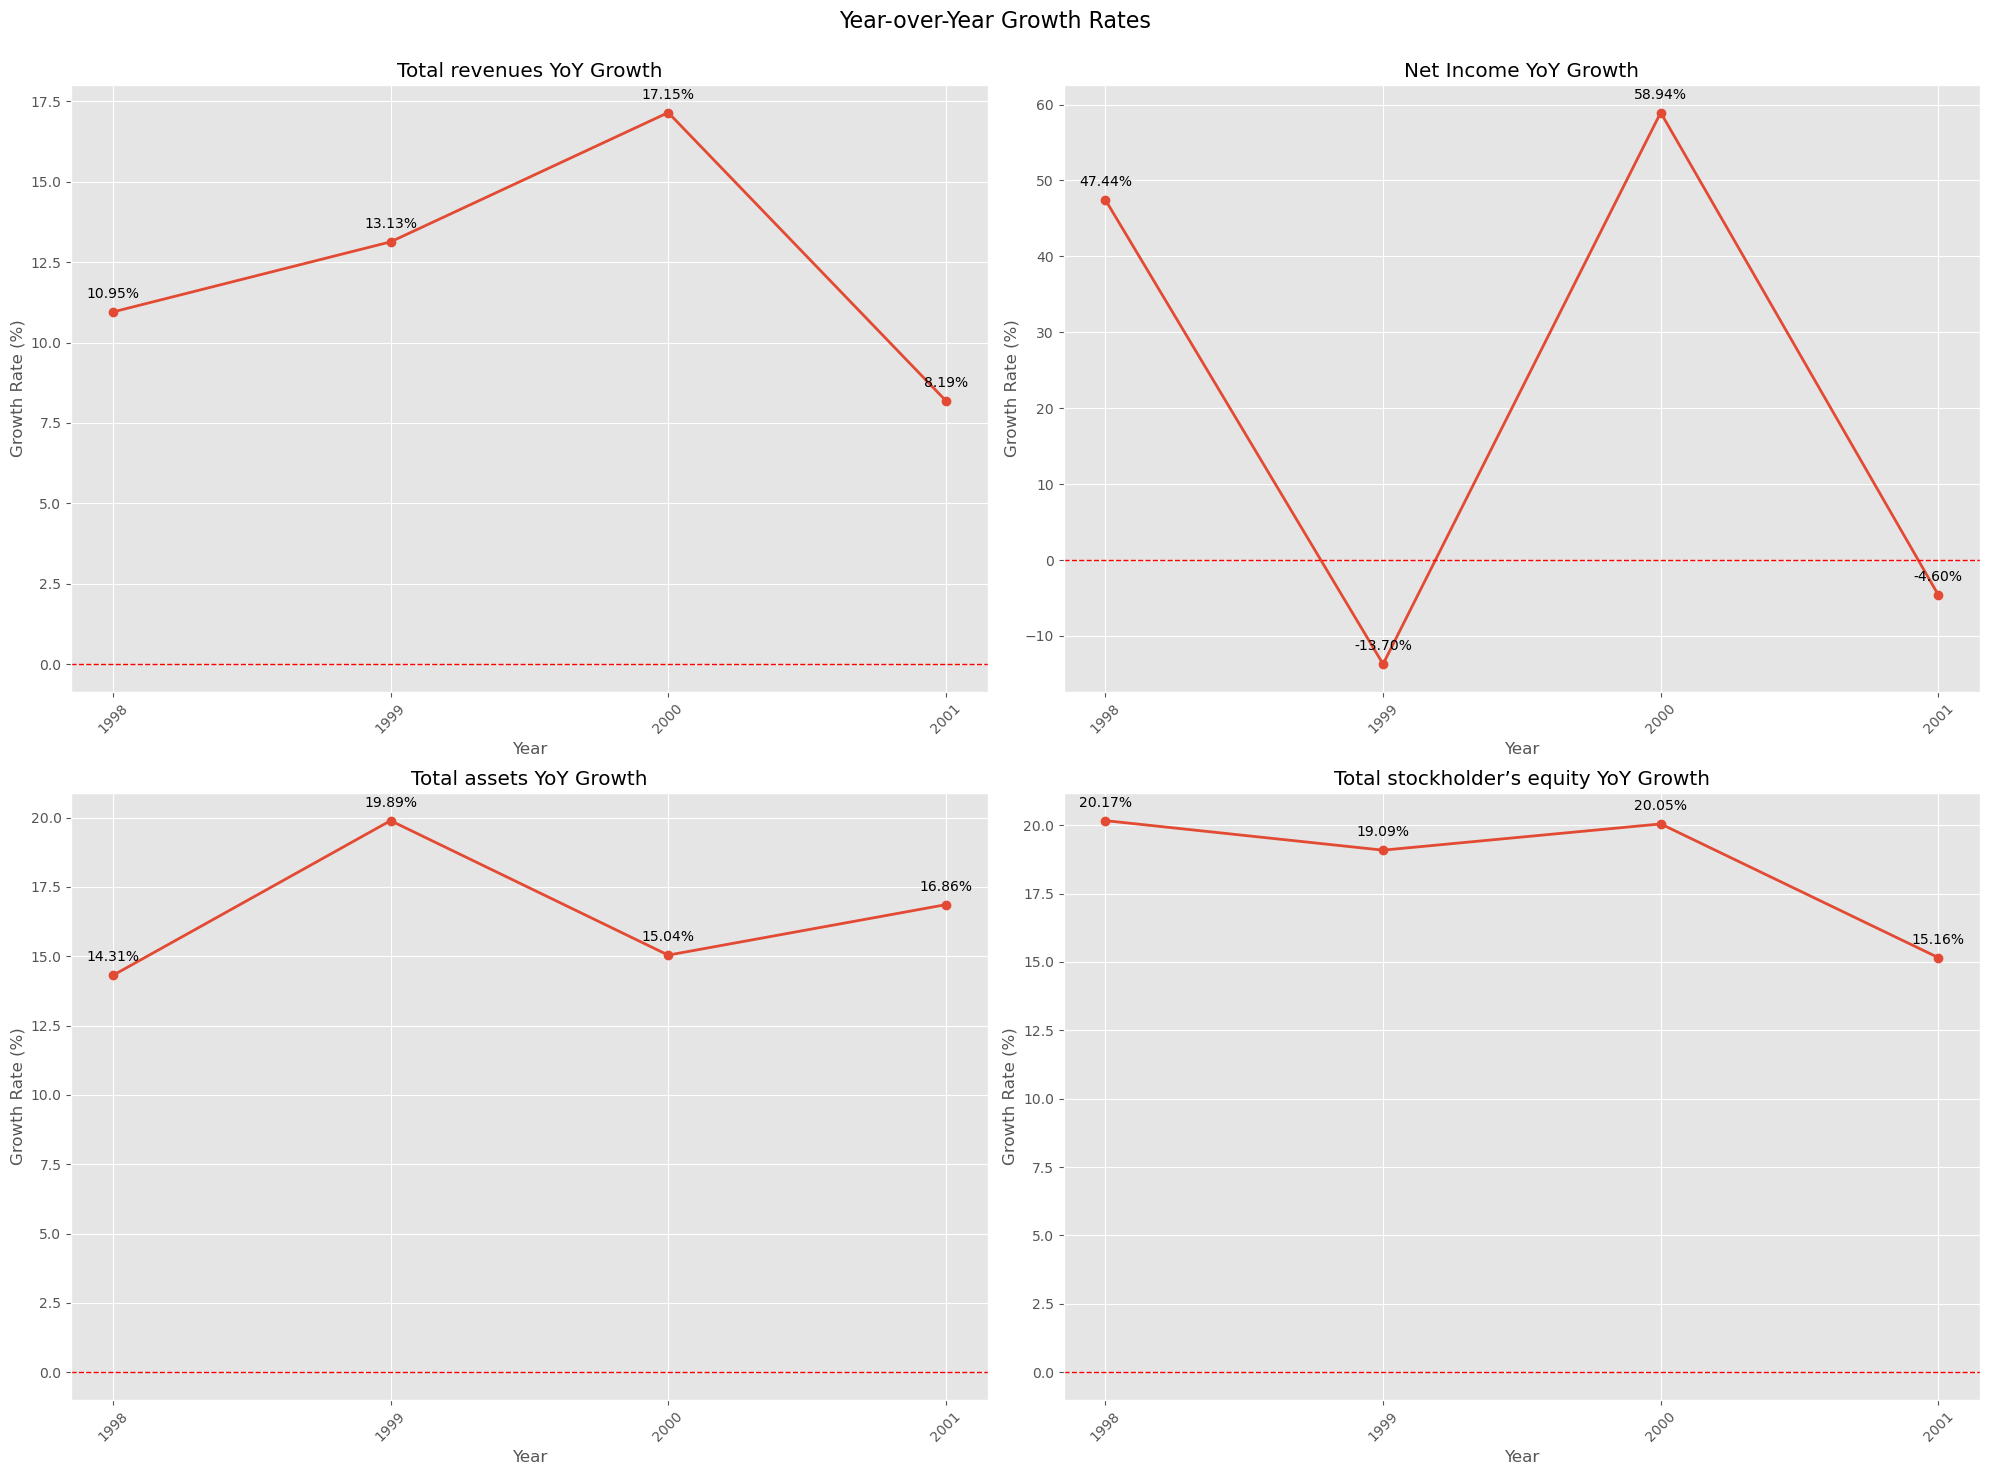

In [187]:
# Create growth rate plots
def create_individual_yoy_growth_plots(df):
    metrics = ['Total revenues YoY Growth', 'Net Income YoY Growth', 
               'Total assets YoY Growth', 'Total stockholder’s equity YoY Growth']
    
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Year-over-Year Growth Rates', fontsize=16)
    
    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        
        # Convert years to int
        years = df.columns[1:].astype(int)
        
        axs[row, col].plot(years, df.loc[metric][1:], marker='o', linestyle='-', linewidth=2)
        axs[row, col].set_title(metric)
        axs[row, col].set_xlabel('Year')
        axs[row, col].set_ylabel('Growth Rate (%)')
        axs[row, col].grid(True)
        
        # Format x-axis ticks as int
        axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        axs[row, col].tick_params(axis='x', rotation=45)
        
        # Add horizontal line at y=0 for reference
        axs[row, col].axhline(y=0, color='r', linestyle='--', linewidth=1)
        
        # Annotate each point w/ value
        for x, y in zip(years, df.loc[metric][1:]):
            axs[row, col].annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Adjust top header space
    plt.show()

create_individual_yoy_growth_plots(df)

In [188]:
# trend number of members (business + gold star)
df.loc['Number of Members'] = (df.loc['Business (primary cardholders)'] + df.loc['Gold Star'])/1000

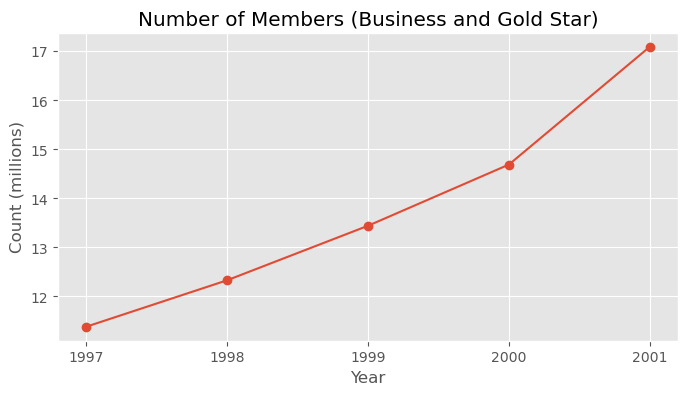

In [191]:
def create_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
create_line_plot(df.columns.astype(int).astype(str), df.loc['Number of Members'], 'Number of Members (Business and Gold Star)', 'Year', 'Count (millions)')

In [168]:
# Analyze membership fees against total revenue
if 'Membership fees and other' in df.index:
    df.loc['Membership Fees % of Revenue'] = df.loc['Membership fees and other'] / df.loc['Total revenues'] * 100
    print("\nMembership Fees as % of Revenue:")
    print(df.loc['Membership Fees % of Revenue'])


Membership Fees as % of Revenue:
1997    1.782939
1998    1.812938
1999    1.748252
2000    1.688223
2001    1.896715
Name: Membership Fees % of Revenue, dtype: float64


In [169]:
# Analyze debt management: Total liabilities/Total SE
if 'Total liabilities' in df.index:
    df.loc['Debt to Equity Ratio'] = (df.loc['Total liabilities']) / df.loc['Total stockholder’s equity']
    print("\nDebt to Equity Ratio:")
    print(df.loc['Debt to Equity Ratio'])


Debt to Equity Ratio:
1997    1.183095
1998    1.075045
1999    1.090598
2000    1.010500
2001    1.042613
Name: Debt to Equity Ratio, dtype: float64


In [170]:
# Analyze operational efficiency ratio: Total operating expenses / Sales (including membership)
if 'Total operating expenses' in df.index:
    df.loc['Operational Efficiency Ratio'] = (df.loc['Total operating expenses']) / df.loc['Total revenues']*100
    print("\nOperational Efficiency Ratio:")
    print(df.loc['Operational Efficiency Ratio'])


Operational Efficiency Ratio:
1997    97.343879
1998    96.757314
1999    96.867716
2000    96.775899
2001    97.149180
Name: Operational Efficiency Ratio, dtype: float64


In [171]:
# Analyze Operating Margin: Operating income / Sales (including membership)
if 'Operating income' in df.index:
    df.loc['Operating Margin'] = df.loc['Operating income'] / df.loc['Total revenues'] * 100
    print("\nOperating Margin:")
    print(df.loc['Operating Margin'])


Operating Margin:
1997    2.656121
1998    3.242686
1999    3.132284
2000    3.224101
2001    2.850820
Name: Operating Margin, dtype: float64


In [172]:
# Analyze Tax Burden: Net Income / Income continuing ops before taxes
if 'Net Income' in df.index:
    df.loc['Tax Burden'] = df.loc['Net Income'] / df.loc['Income continuing ops before taxes'] * 100
    print("\nTax Burden:")
    print(df.loc['Tax Burden'])


Tax Burden:
1997    60.000000
1998    60.052219
1999    46.216531
2000    59.980989
2001    60.019940
Name: Tax Burden, dtype: float64
